In [26]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

## Relación entre publicaciones y postulaciones

In [2]:
types= {"nombre_area": "category", "nivel_laboral": "category", "tipo_de_trabajo": "category"}
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv', dtype=types)

In [3]:
datetimes=["fechapostulacion"]
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv', parse_dates=datetimes)

In [4]:
df_postulaciones_avisos = pd.merge(df_avisos_detalle,df_postulaciones, on="idaviso", how="inner")

In [6]:
postulaciones_promedio_tipo_trabajo=df_postulaciones_avisos.groupby(["tipo_de_trabajo"]).size()/df_avisos_detalle.groupby("tipo_de_trabajo").size()

### Relacion segun tipo de trabajo

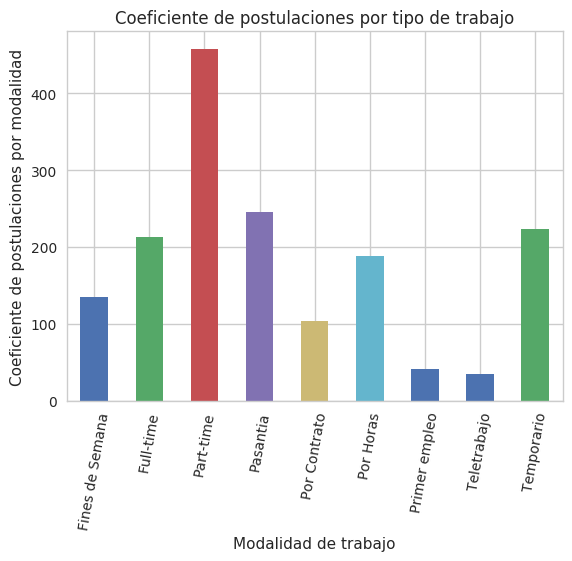

In [7]:
title = 'Coeficiente de postulaciones por tipo de trabajo'
ax = postulaciones_promedio_tipo_trabajo.plot(kind='bar',rot=80,title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por modalidad');
ax.set_xlabel('Modalidad de trabajo');

La modalidad con mayor coeficiente de postulantes es la modalidad *"Part-time"*, el segundo puesto pertenece a *"Temporario"* con casi la mitad del anterior. Las modalidades que presentarn un menor coeficiente son *"Teletrabajo"* y *"Primer empleo"*

In [8]:
df_postulaciones_avisos["diadelasemana"] = df_postulaciones_avisos.fechapostulacion.dt.dayofweek
aux = df_postulaciones_avisos.groupby(["tipo_de_trabajo","diadelasemana"]).size().to_frame().reset_index(level=[0,1])
aux.columns = ['tipo_de_trabajo', 'dia_de_la_semana', 'cantidad']

[]

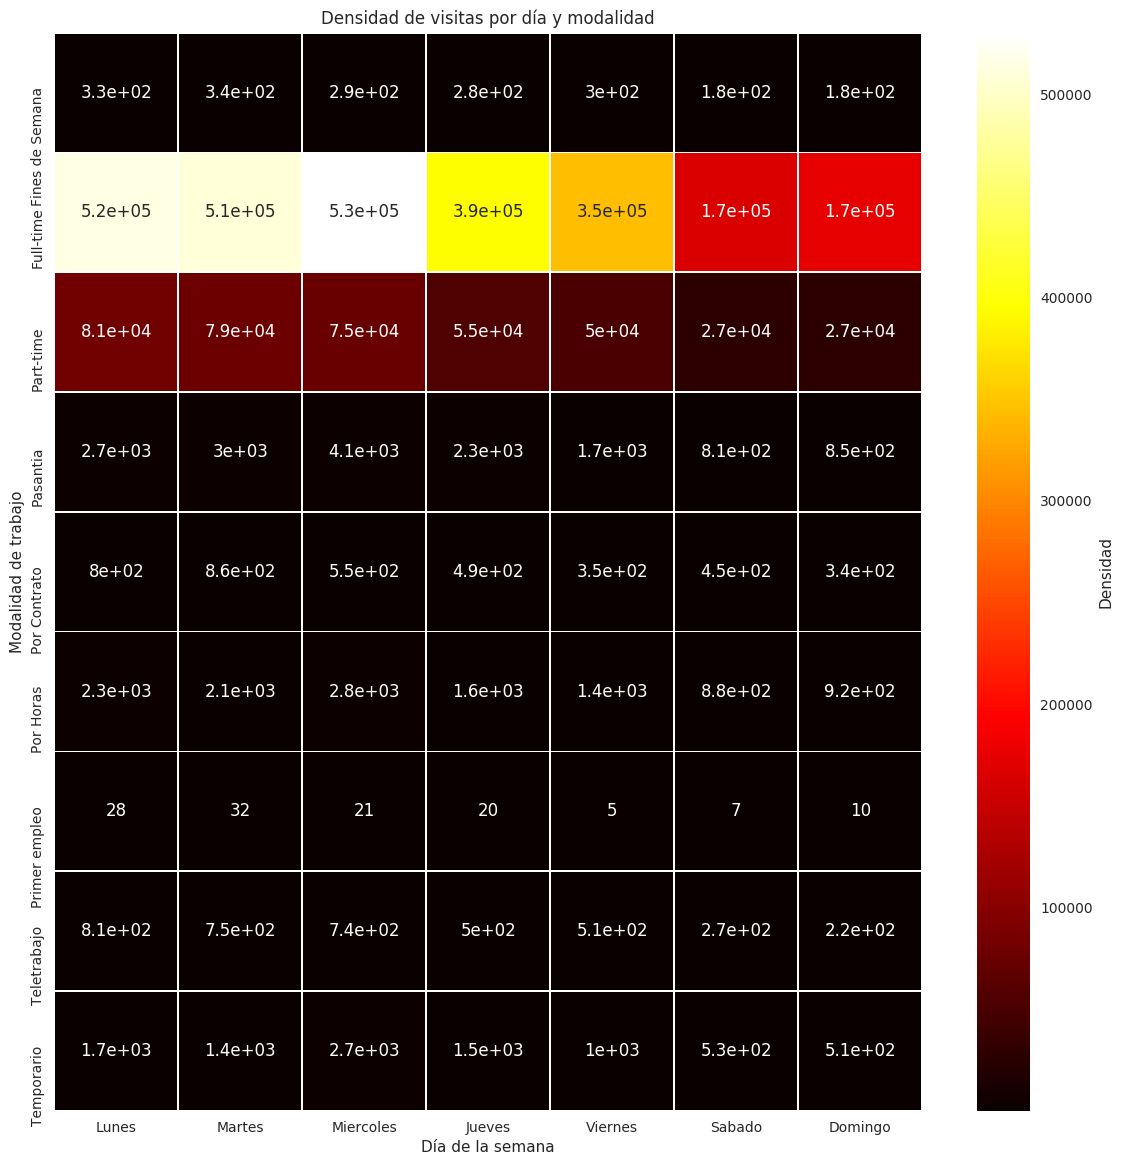

In [9]:
fig, ax = plt.subplots(figsize=(14,14))

weekday_map= ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
graph = sns.heatmap(aux.pivot_table(index='tipo_de_trabajo',columns='dia_de_la_semana',values='cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Modalidad de trabajo');
ax.set_title("Densidad de visitas por día y modalidad")
graph.plot()

Text(0.5,1,'Densidad de visitas por día y modalidad')

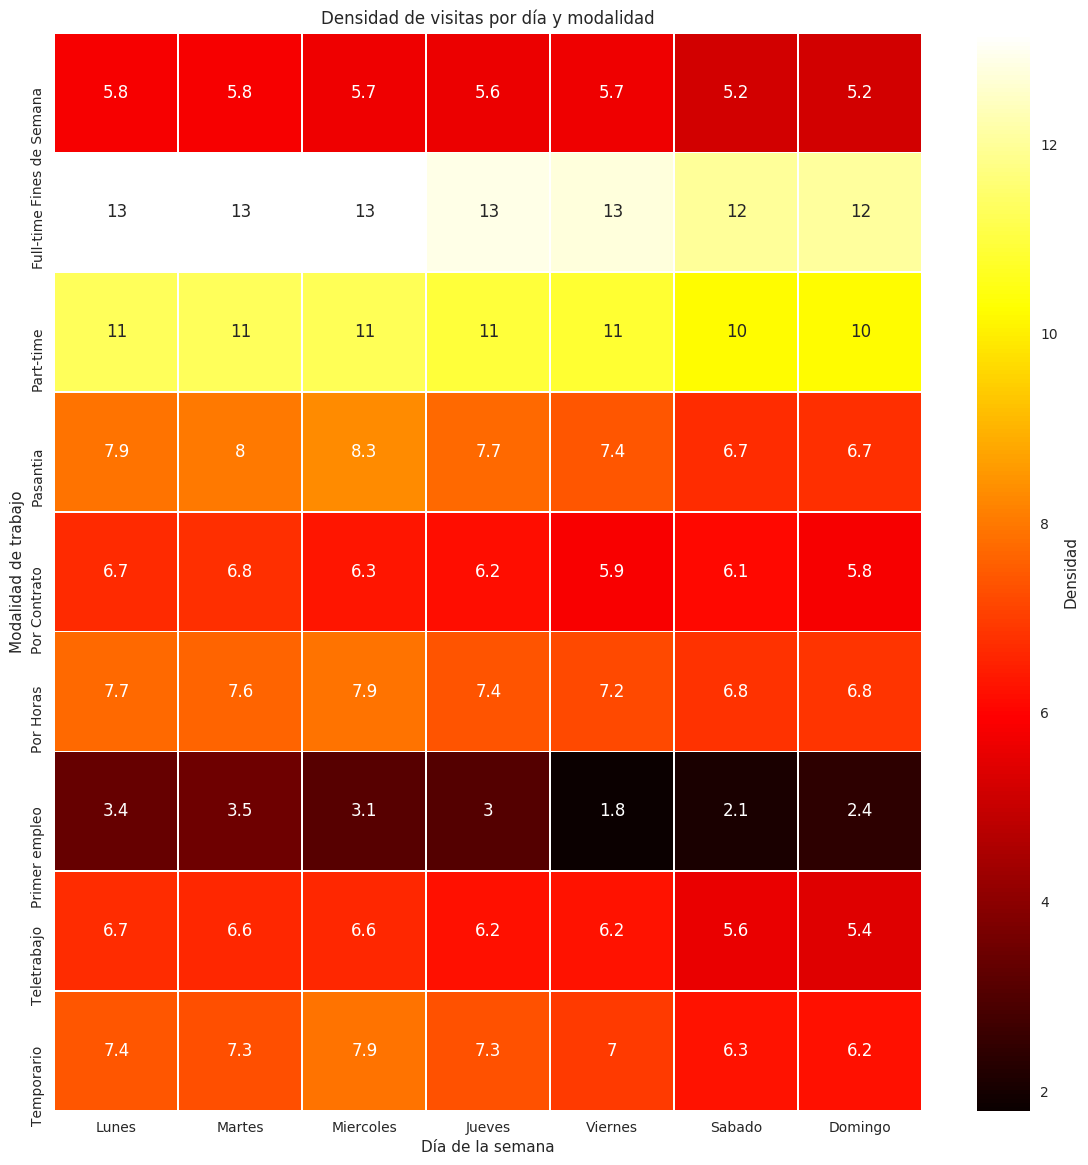

In [10]:
aux["log_cantidad"] = np.log(aux.cantidad+1)
fig, ax = plt.subplots(figsize=(14,14))

graph = sns.heatmap(aux.pivot_table(index='tipo_de_trabajo',columns='dia_de_la_semana',values='log_cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Modalidad de trabajo');
ax.set_title("Densidad de visitas por día y modalidad")

## Relacion segun nivel laboral

In [11]:
postulaciones_promedio_nivel_laboral=df_postulaciones_avisos.groupby(["nivel_laboral"]).size()/df_avisos_detalle.groupby("nivel_laboral").size()

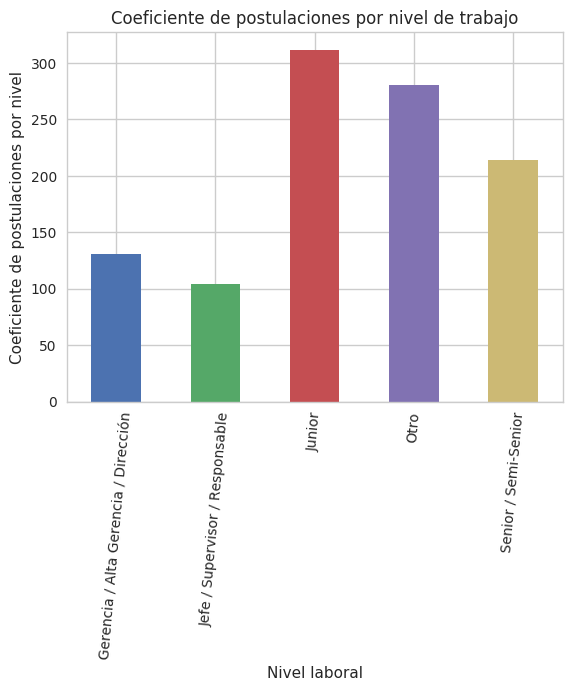

In [12]:
title = 'Coeficiente de postulaciones por nivel de trabajo'
postulaciones_promedio_nivel_laboral.plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por nivel');
ax.set_xlabel('Nivel laboral');

In [18]:
aux = df_postulaciones_avisos.groupby(["nivel_laboral","diadelasemana"]).size().to_frame().reset_index(level=[0,1])
aux.columns = ['nivel_laboral', 'dia_de_la_semana', 'cantidad']

Text(0.5,1,'Densidad de visitas por día y modalidad')

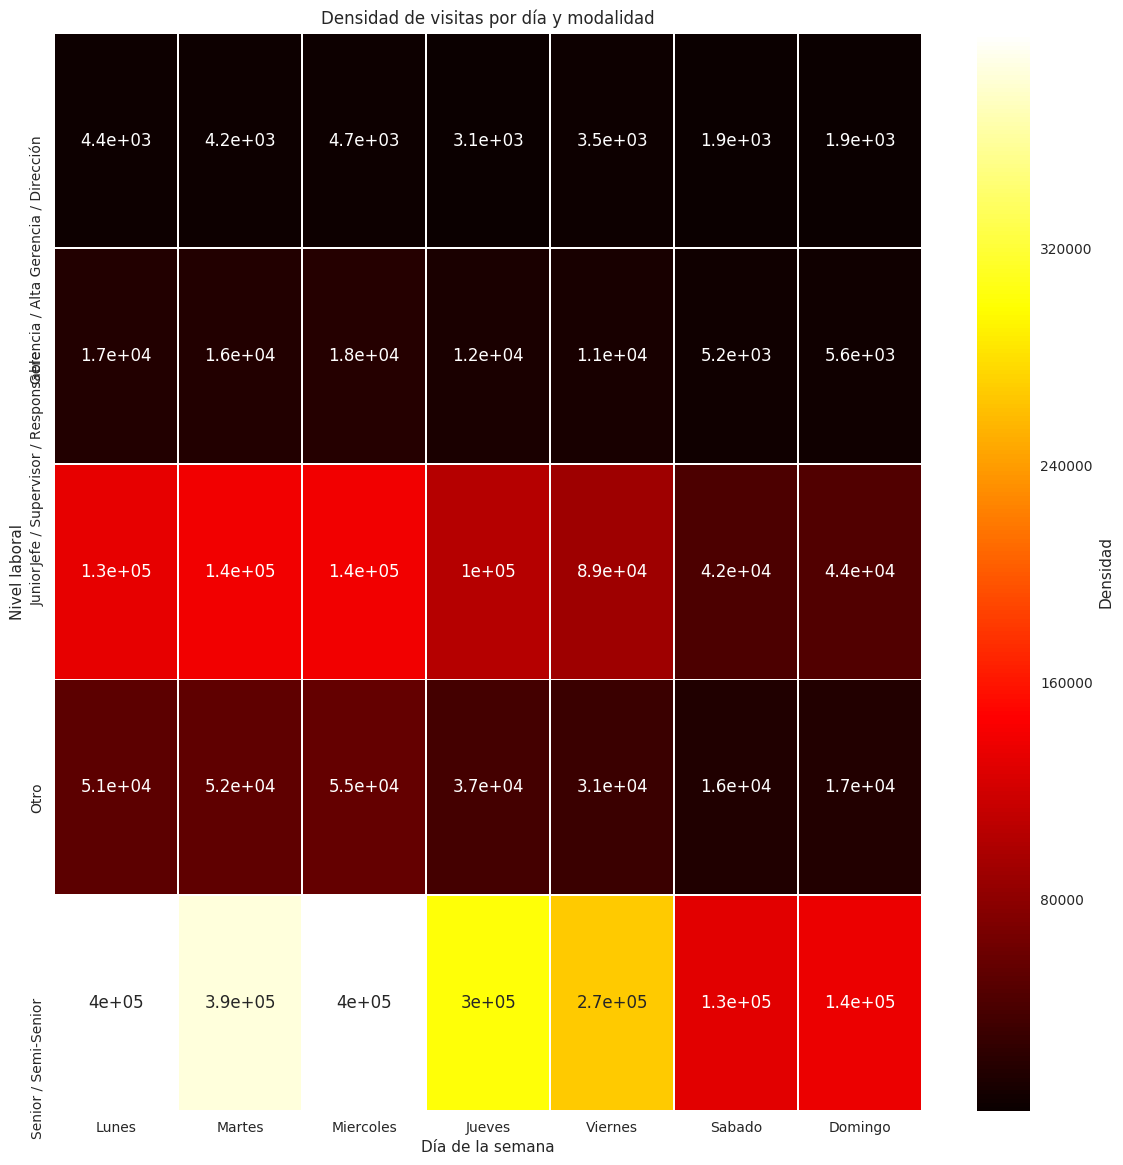

In [28]:
fig, ax = plt.subplots(figsize=(14,14))

graph = sns.heatmap(aux.pivot_table(index='nivel_laboral',columns='dia_de_la_semana',values='cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Nivel laboral');
ax.set_title("Densidad de visitas por día y modalidad")

Text(0.5,1,'Densidad de visitas por día y modalidad')

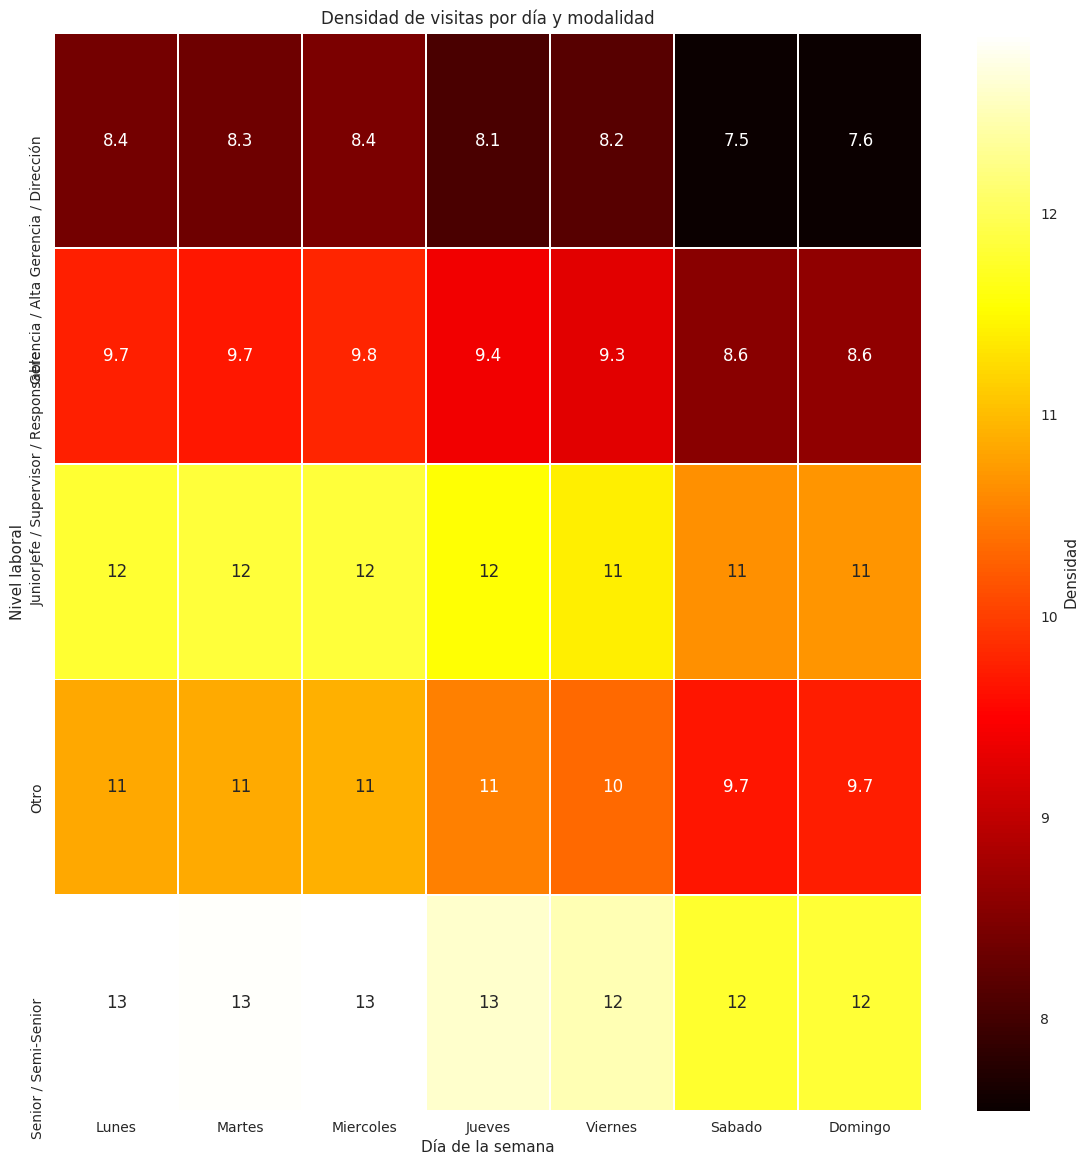

In [30]:
aux["log_cantidad"] = np.log(aux.cantidad+1)
fig, ax = plt.subplots(figsize=(14,14))
graph = sns.heatmap(aux.pivot_table(index='nivel_laboral',columns='dia_de_la_semana',values='log_cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Nivel laboral');
ax.set_title("Densidad de visitas por día y modalidad")

## Relacion segun area

In [36]:
postulaciones_promedio_area=df_postulaciones_avisos.groupby(["nombre_area"]).size()/df_avisos_detalle.groupby("nombre_area").size()

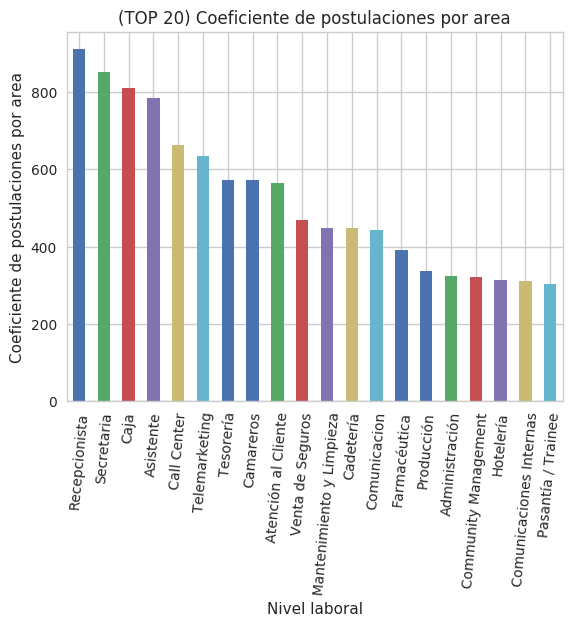

In [64]:
title = '(TOP 20) Coeficiente de postulaciones por area'
postulaciones_promedio_area.sort_values(ascending=False).head(20)\
    .plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por area');
ax.set_xlabel('Nivel laboral');

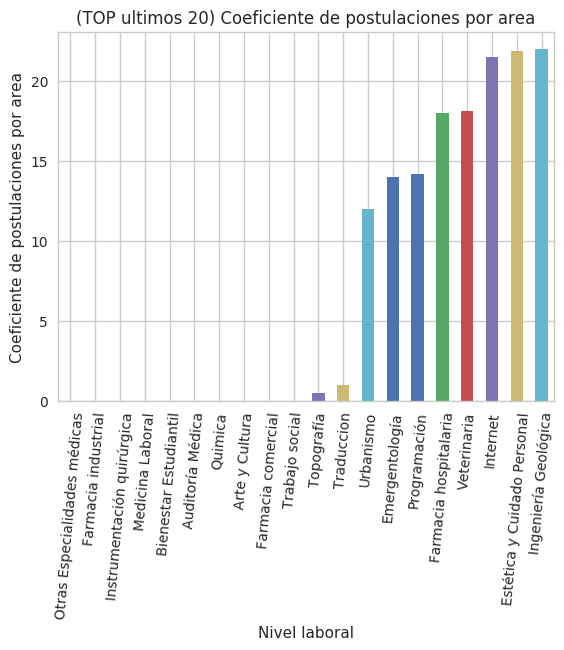

In [66]:
title = '(TOP ultimos 20) Coeficiente de postulaciones por area'
postulaciones_promedio_area.sort_values().head(20)\
    .plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por area');
ax.set_xlabel('Nivel laboral');